# LFU Plot

This notebook is an attempt to reproduce the LFU plots in [1]. \
While reproducing the 2023 tau mass measurement from Belle II [2].\
Another useful resource is [3] and [4].\

NOTE: There is currently a mismatch between this calculation and the plots in [1].\


[1] https://arxiv.org/pdf/1804.08436.pdf \
[2] https://arxiv.org/abs/2305.19116 \
[3] https://hflav-eos.web.cern.ch/hflav-eos/tau/winter-2022/lepton-univ.html \
[4] https://arxiv.org/pdf/1310.7922.pdf


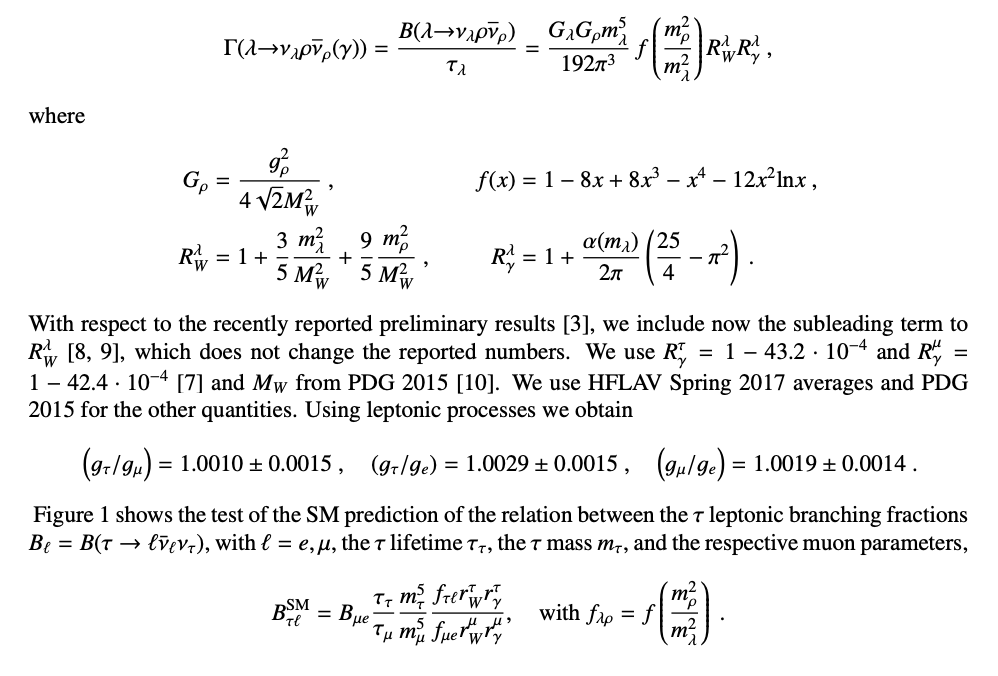

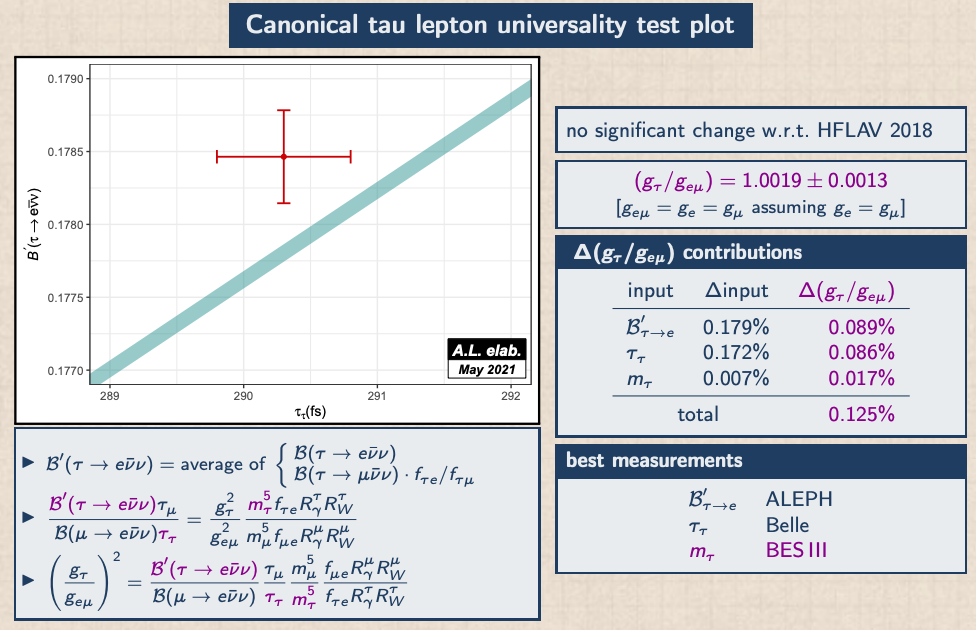

In [51]:
#print(Bprime_tau_to_e,  )


In [52]:
##
## Define constants and measurements
##

from uncertainties import umath, unumpy, ufloat
import numpy as np

## Life times:
tau_tau = ufloat(2.903*1E-13, 0.005*1E-13, tag='tau_tau')           # s
tau_mu  = ufloat(2.1969811*1E-6, 0.0000022*1E-6, tag='tau_mu')      # s


# Masses
m_tau   = ufloat(1776.86*1E-3,0.12*1E-3, tag='m_tau')               # GeV
m_mu    = ufloat(105.6583755*1E-3,0.0000023*1E-3, tag='m_mu')       # GeV
m_e     = ufloat(0.51099895000*1E-3, 0.00000000015*1E-3, tag='m_e') # GeV
m_w     = ufloat(80.377, 0.012, tag='m_w')                          # GeV


## Branching fractions
B_tau_to_mu = ufloat(17.3937, 0.0384 , tag='B_tau_to_mu')/100       # 
B_tau_to_e  = ufloat(17.8175, 0.0399, tag='B_tau_to_e')/100         # 


## 

F = lambda x: 1-8*x + 8*x**3 - x**4 - 12*x**2*unumpy.log(x)

f_taumu  = F(m_tau.n**2/m_mu.n**2)
f_taue   = F(m_tau.n**2/m_e.n**2)
f_tau_e  = F(m_e**2/m_tau**2)
f_tau_mu = F(m_mu**2/m_tau**2)
f_mu_e   = F(m_e**2/m_mu**2)


## 

R = lambda m_h, m_l: 1+3/5*m_l**2/m_w**2 + 9/5*m_h**2/m_w**2

r_tau_w = R(m_tau, m_mu)
r_mu_w = R(m_tau, m_e)

#r_tau_w = R(m_tau, m_tau)
#r_mu_w = R(m_mu, m_mu)

Rtaugamma = 1-43.2*1E-4
Rmugamma = 1-42.4*1E-4 


B_tau_to_e2 = B_tau_to_mu * f_tau_e/f_tau_mu 
Bprime_tau_to_e = np.average([B_tau_to_e.n, B_tau_to_e2.n])


def pred(m_tau=m_tau, tau_tau=tau_tau):
    nom   = tau_tau* m_tau**5 * f_tau_e * r_tau_w * Rtaugamma
    denom = tau_mu * m_mu**5 * f_mu_e * r_mu_w * Rmugamma
    return nom/denom
    

In [53]:
# These values were graphically extracted from the AL plots

AL_Bprime_tau_to_e = ufloat(0.17846007, 0.0003195) # this was graphically extracted from the plot

p1 = [288.89368258859787, 0.17699575371549892]
p2 = [291.7388289676425, 0.1787452229299363]
p3 = [292.00462249614793, 0.17878556263269638]
p4 = [289, 0.17694267515923567]


band = np.concatenate([[p1],[p2],[p3],[p4]]).T



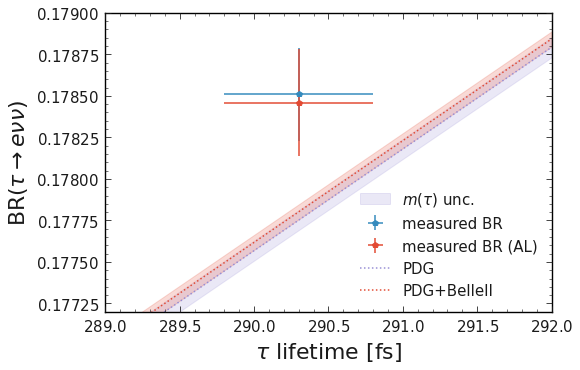

In [54]:
#pred = nom/denom
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('belle2')

fig, ax = plt.subplots()

x_range = np.linspace(289, 292, 30)
x_range_fs = x_range*1E-15

y_pred = pred(tau_tau = x_range_fs )
y_pred = [y.n for y in y_pred]
y_pred_up = [y.n for y in pred(m_tau=m_tau+m_tau.s, tau_tau = x_range_fs )]
y_pred_down = [y.n for y in pred(m_tau=m_tau-m_tau.s, tau_tau = x_range_fs )]

Bprime_tau_to_e = np.mean( [B_tau_to_e,B_tau_to_e2] )


ax.errorbar( [tau_tau.n*1E15], [Bprime_tau_to_e.n],    yerr=[Bprime_tau_to_e.s],    xerr=[tau_tau.s*1E15], fmt="p" ,label='measured BR')
ax.errorbar( [tau_tau.n*1E15], [AL_Bprime_tau_to_e.n], yerr=[AL_Bprime_tau_to_e.s], xerr=[tau_tau.s*1E15], fmt="p" ,label='measured BR (AL)')


ax.errorbar( x_range, y_pred, color='C2',  label=r'PDG', ls=':')
ax.fill_between(x_range, y_pred_up, y_pred_down, label=r'$m(\tau)$ unc.', color='C2', alpha=0.2)

m_tau_new   = ufloat(1776.96*1E-3,0.09*1E-3, tag='m_tau_new') #GeV

y_pred_new      = [y.n for y in pred(m_tau=m_tau_new, tau_tau=x_range_fs )]
y_pred_up_new   = [y.n for y in pred(m_tau=m_tau_new+m_tau_new.s, tau_tau=x_range_fs )]
y_pred_down_new = [y.n for y in pred(m_tau=m_tau_new-m_tau_new.s, tau_tau=x_range_fs )]

ax.errorbar( x_range, y_pred_new, label=r'PDG+BelleII', color='C1', ls=':' )
ax.fill_between(x_range, y_pred_up_new, y_pred_down_new, color='C1', alpha=0.2)



#ax.set_ylim(0.177, 0.1795)
ax.set_ylim(0.1772, 0.179)
#ax.set_xlim(289.5, 291)

ax.set_xlim(289, 292)
ax.set_ylabel(r'BR($\tau\rightarrow e \nu \nu$)')
ax.set_xlabel(r'$\tau$ lifetime [fs]')
ax.legend(ncol=1, loc='lower right')


fig.savefig('BR_vs_taulifetime.pdf', bbox_inches='tight')



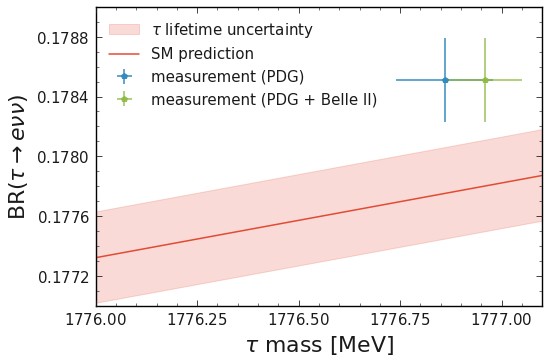

In [55]:

#https://arxiv.org/pdf/1804.08436.pdf
#pred = nom/denom

import matplotlib.pyplot as plt
plt.style.use('belle2')


fig, ax = plt.subplots()

x_range = np.linspace(1775, 1778, 30)

y_pred = pred(m_tau = x_range*1E-3 )
y_pred = [y.n for y in y_pred]

y_pred_up   = [y.n for y in pred(m_tau=x_range*1E-3, tau_tau=tau_tau+tau_tau.s )]
y_pred_down = [y.n for y in pred(m_tau=x_range*1E-3, tau_tau=tau_tau-tau_tau.s )]

Bprime_tau_to_e = np.mean( [B_tau_to_e,B_tau_to_e2] )

#ax.errorbar( [tau_tau.n*1E15], [Bprime_tau_to_e.n], yerr=[Bprime_tau_to_e.s], xerr=[tau_tau.s*1E15], fmt="p" ,label='measured BR')
ax.fill_between(x_range, y_pred_up, y_pred_down, color='C1', alpha=0.2, label=r'$\tau$ lifetime uncertainty')
ax.errorbar( x_range, y_pred, label=r'SM prediction', color='C1')

ax.errorbar( [m_tau.n*1E3], [Bprime_tau_to_e.n], yerr=[Bprime_tau_to_e.s], xerr=[m_tau.s*1E3], fmt="p" ,label='measurement (PDG)')
ax.errorbar( [m_tau_new.n*1E3], [Bprime_tau_to_e.n], yerr=[Bprime_tau_to_e.s], xerr=[m_tau_new.s*1E3], fmt="p" ,label='measurement (PDG + Belle II)', color='C5', alpha=0.9)


ax.set_ylabel(r'BR($\tau\rightarrow e \nu \nu$)')
ax.set_xlabel(r'$\tau$ mass [MeV]')

ax.legend(ncol=1, loc='upper left')
ax.set_xlim(1776, 1777.1)
ax.set_ylim(0.1770, 0.179)
#ax.tick_params(axis='x', )
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.yaxis.set_major_locator(plt.MaxNLocator(6))
#ax.numCols=3

fig.savefig('BR_vs_taumass.pdf', bbox_inches='tight')
